Data Cleaned. Rides Removed = 463
Data Cleaned. Rides Removed = 463
Data Cleaned. Rides Removed = 466
imported


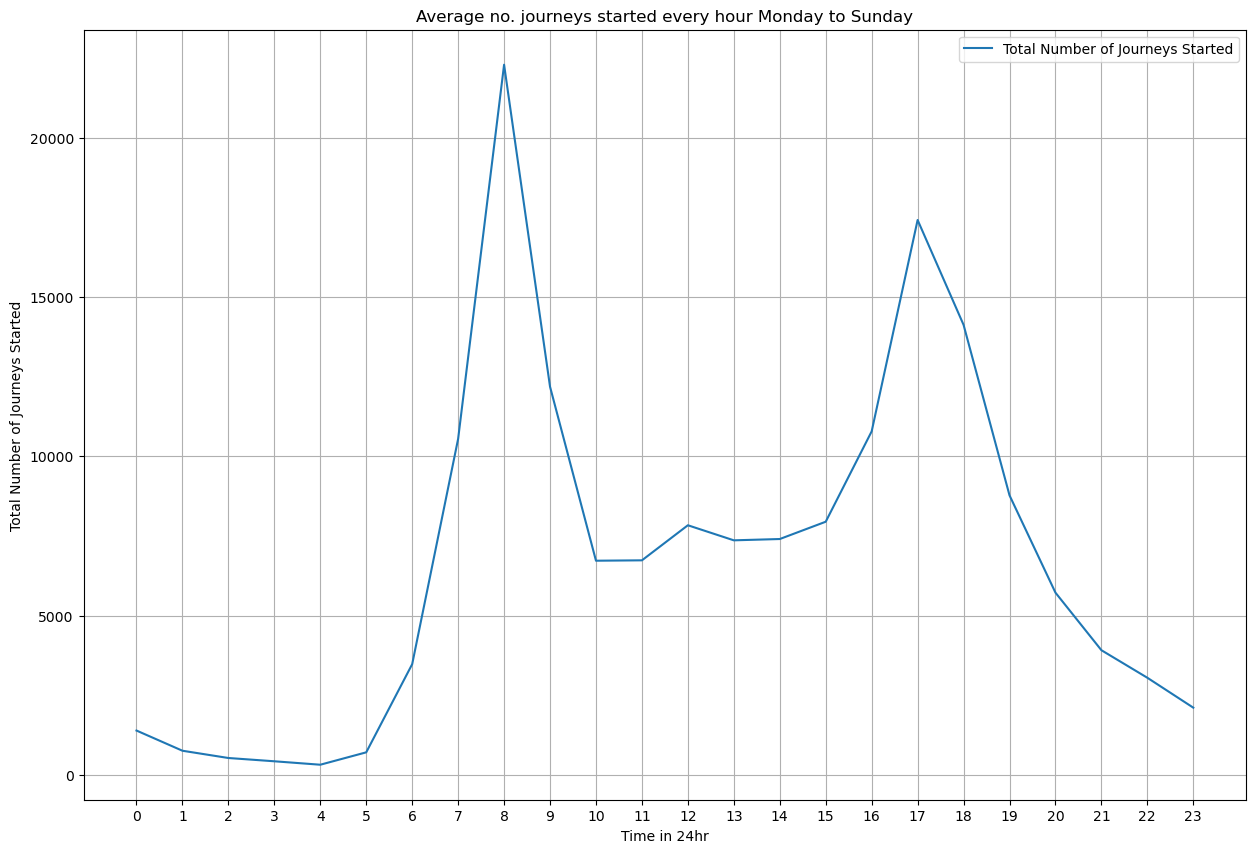

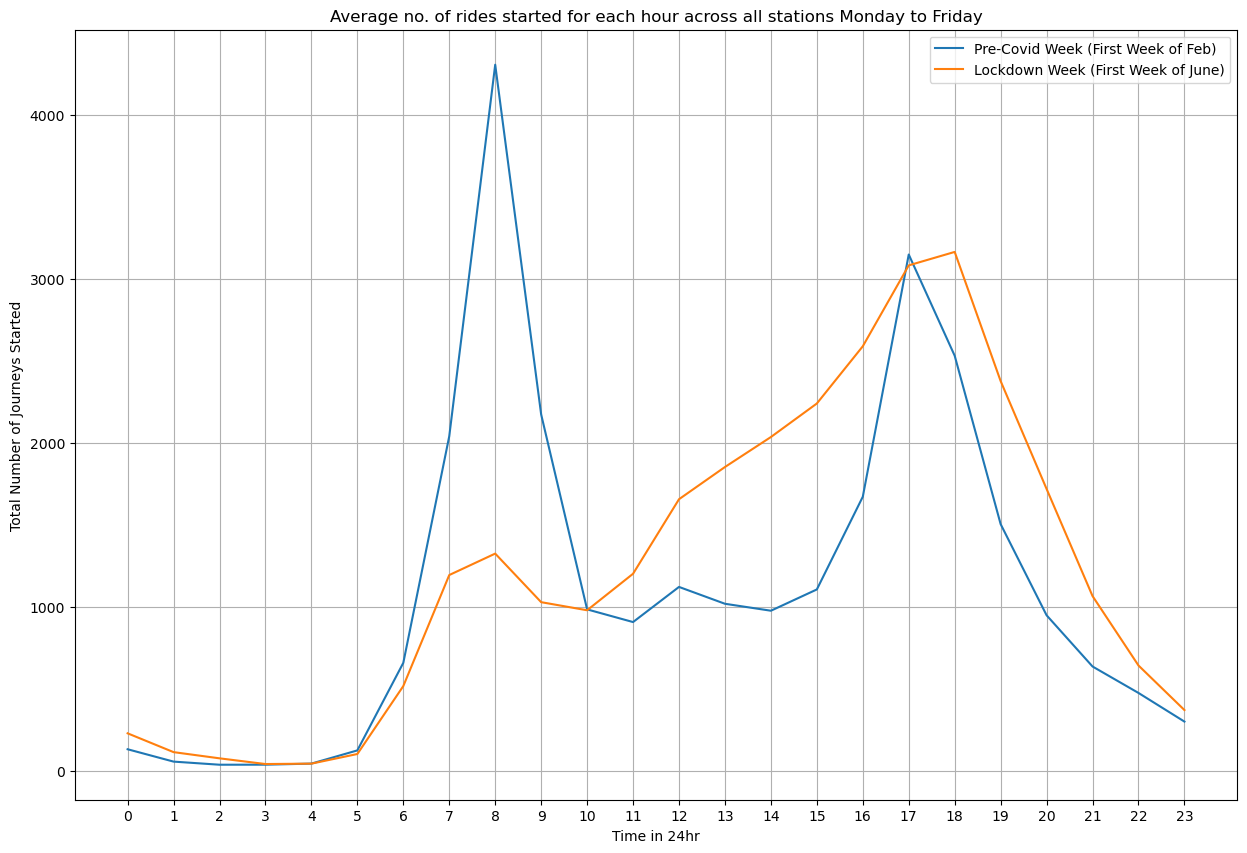

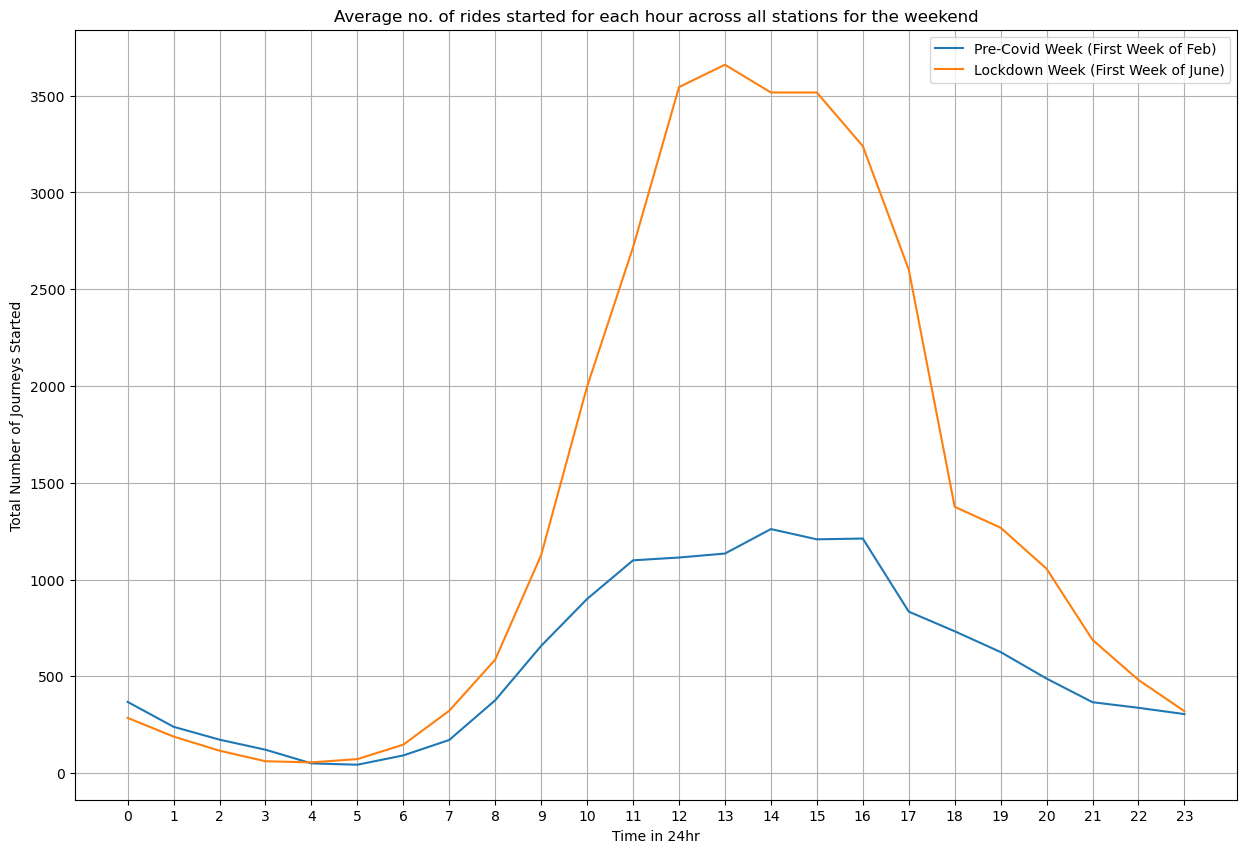

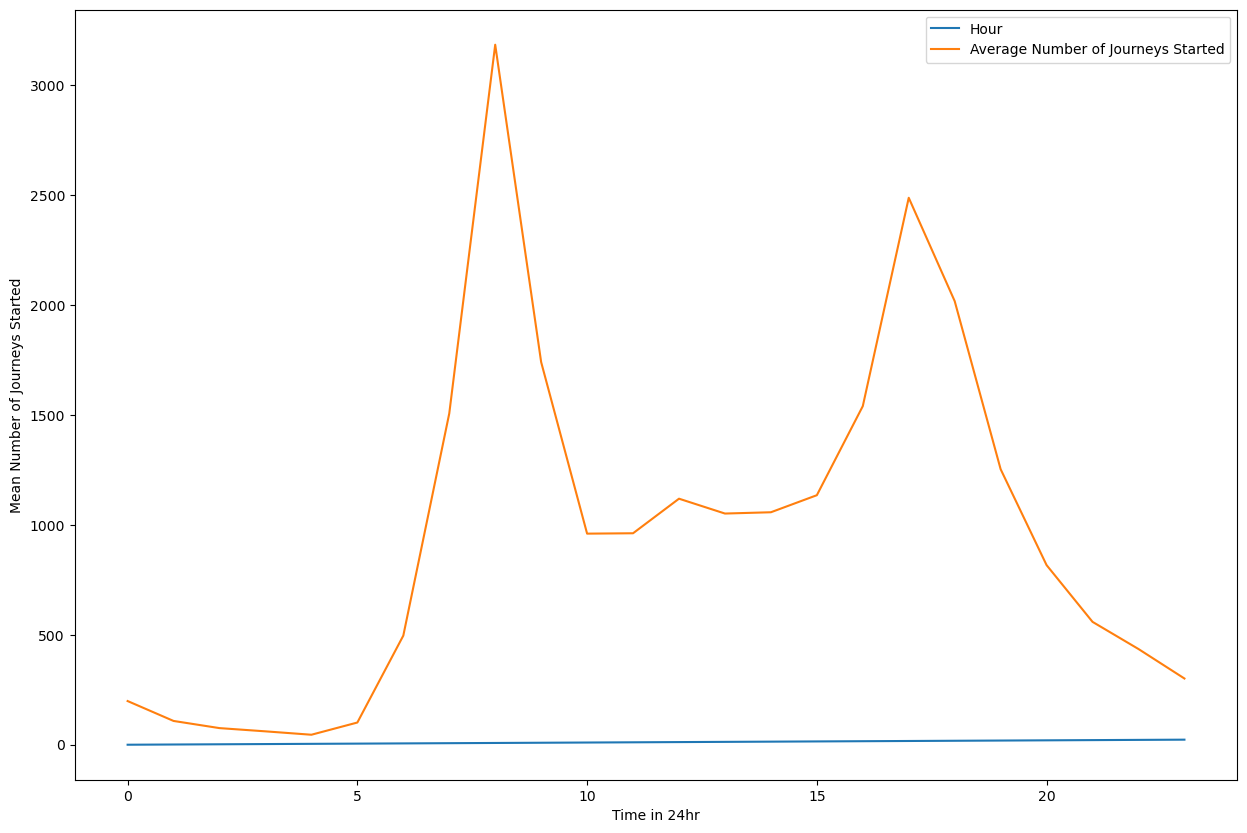

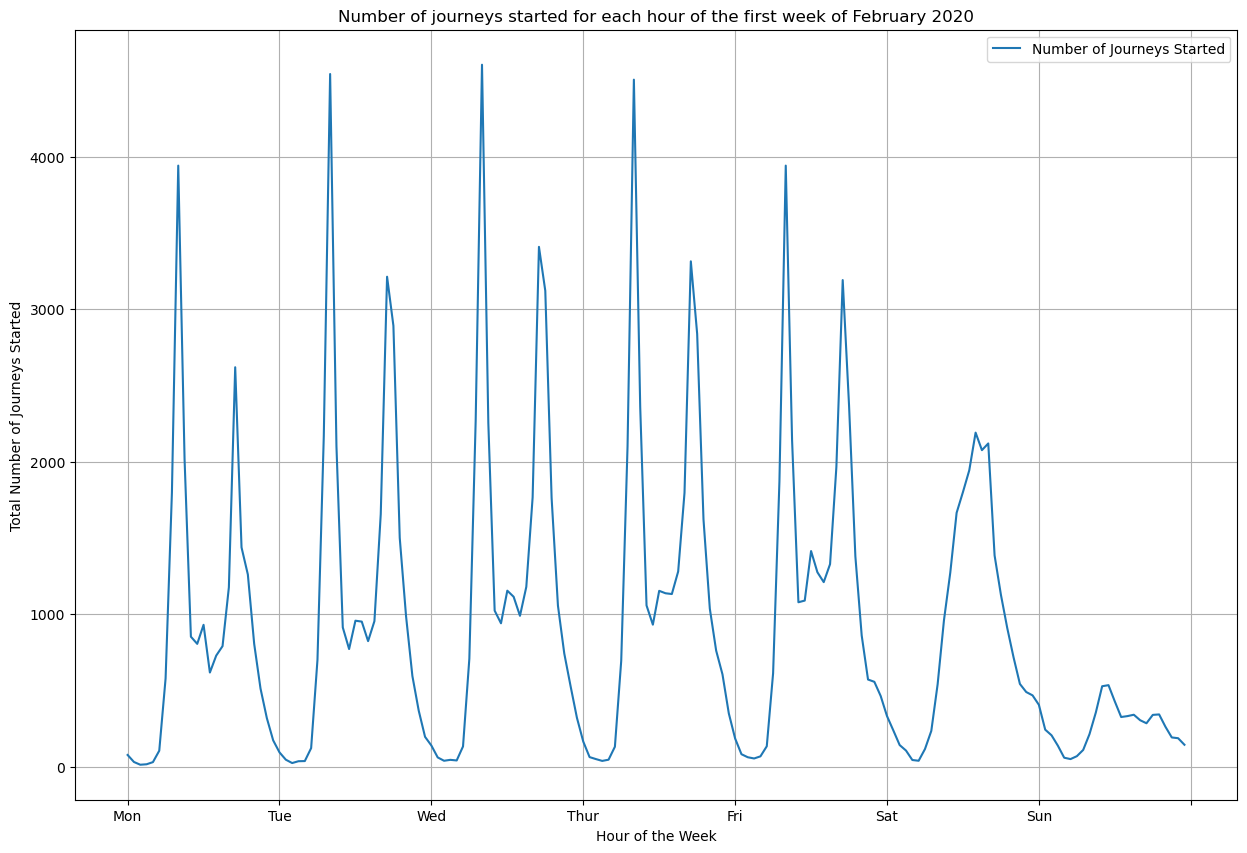

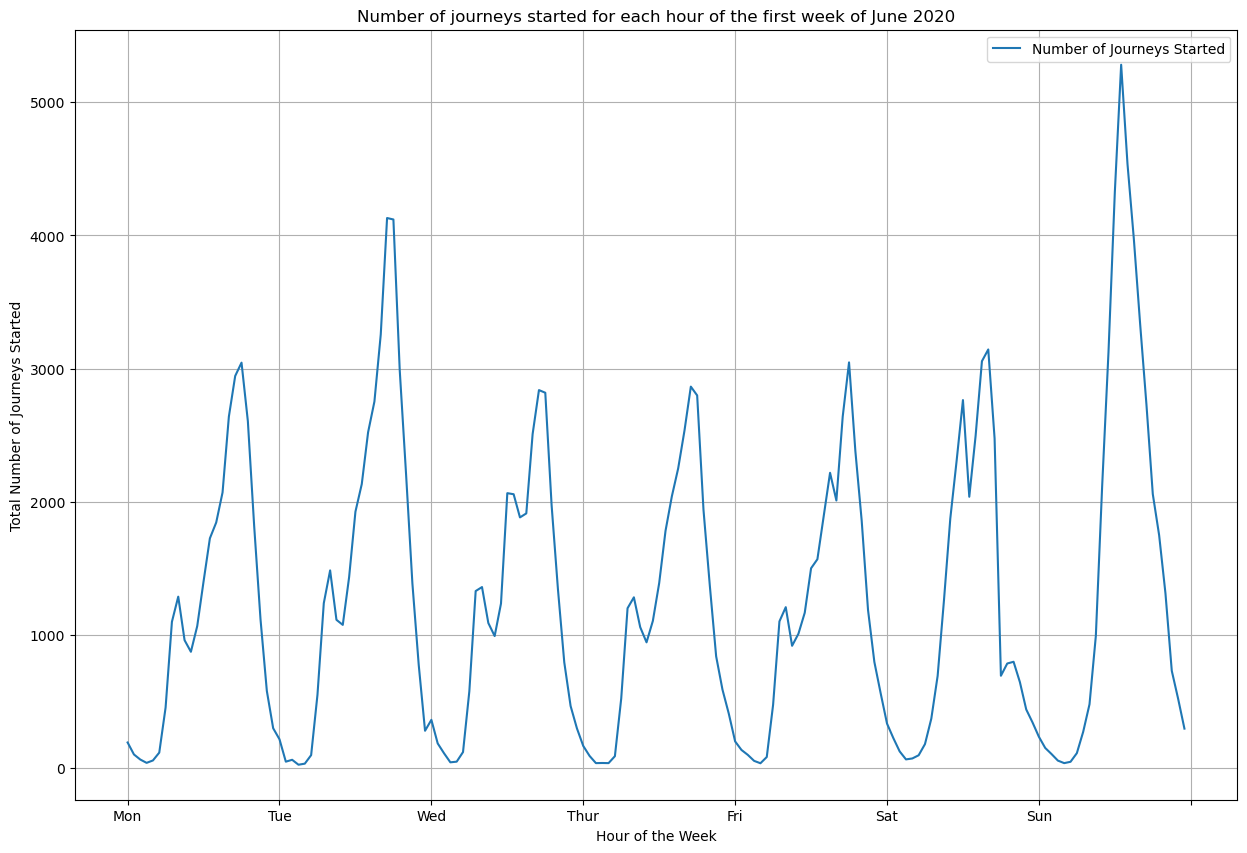

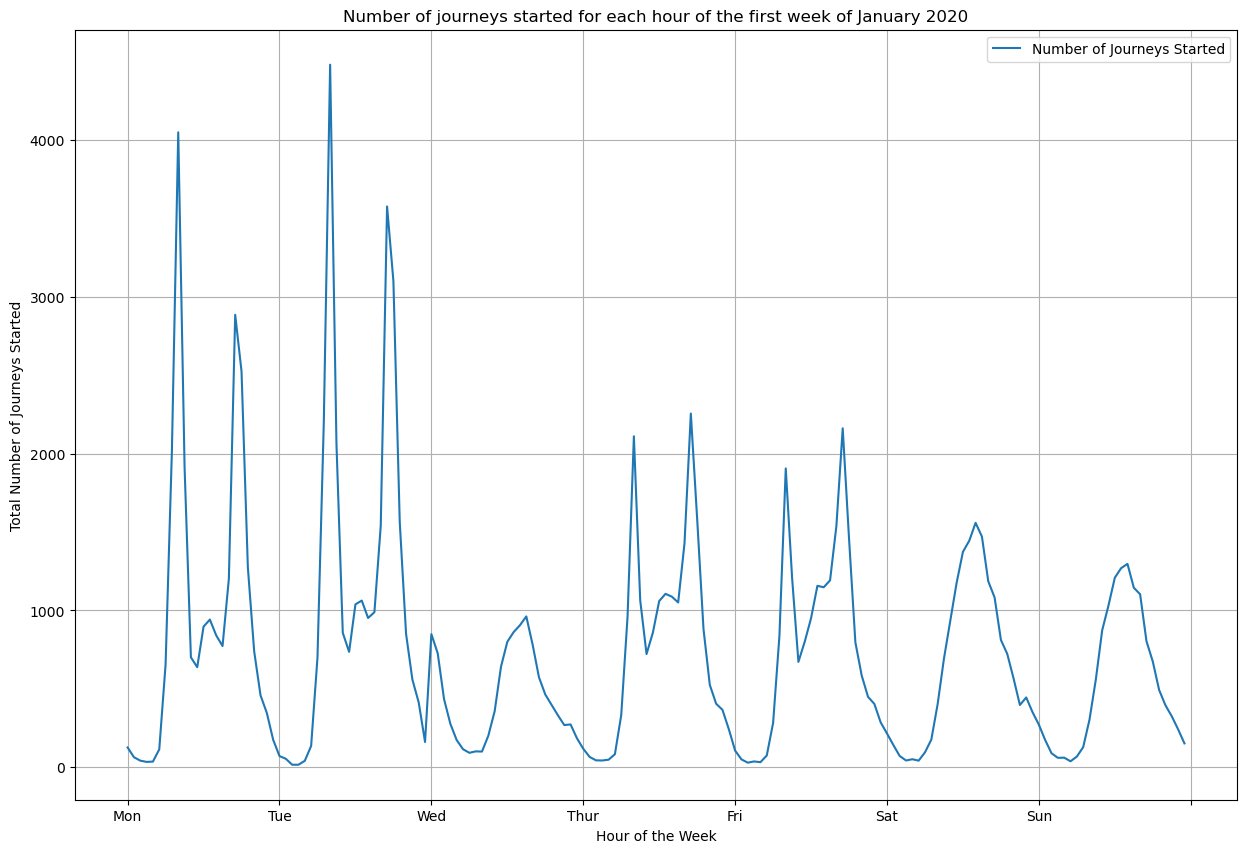

imported
imported
Empty DataFrame
Columns: [StationId, StationName, Change in number of bikes, longitude, latitude]
Index: []
imported


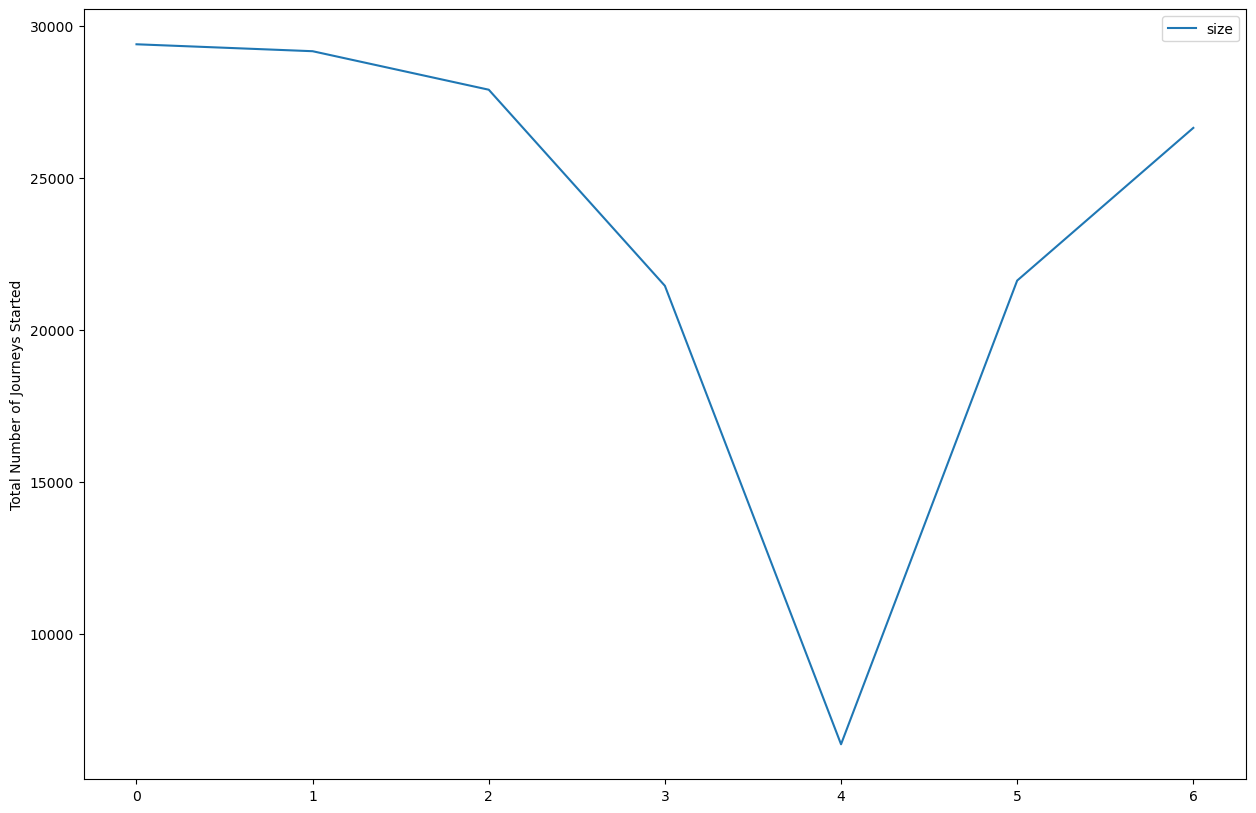

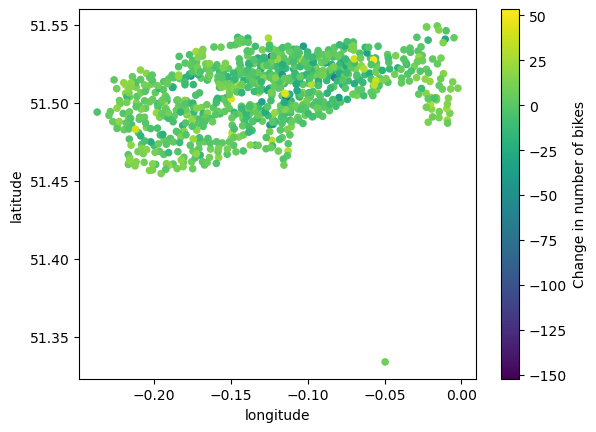

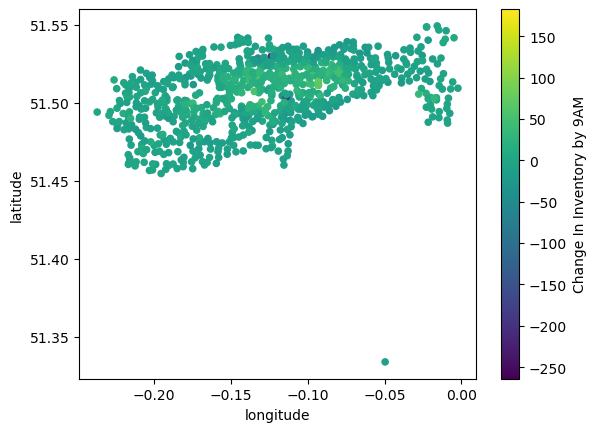

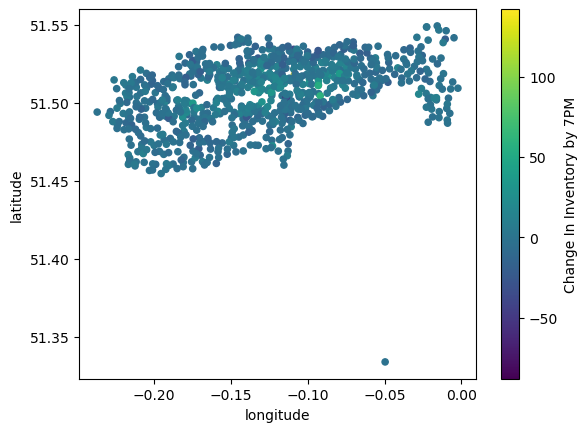

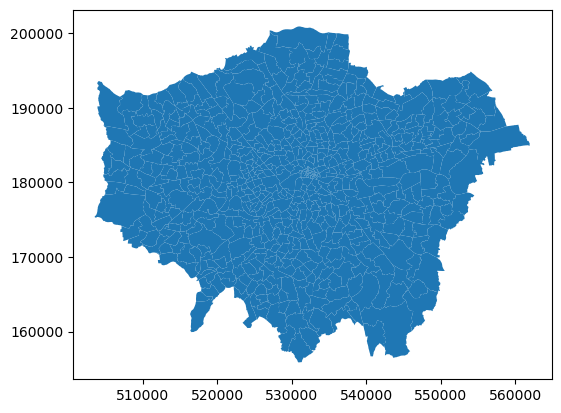

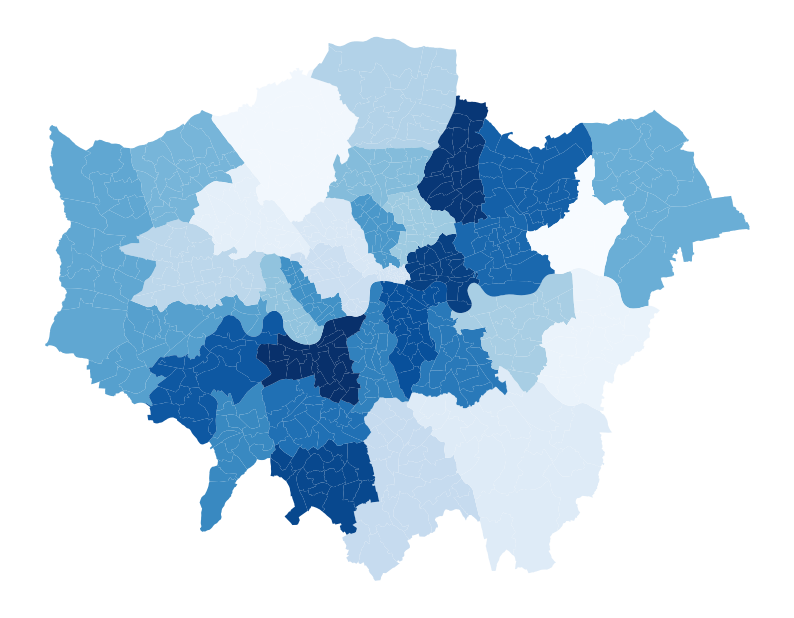

In [1]:
# hypothesis - geographical bubbles of bike stations should exist where total overflow and underflow at the end of the day
#              should balance out to 0 between the cluster of stations

from ipynb.fs.full.Mapping import inventoryAndCoordsDF, inventoryAndCoords11PMDF

print("imported")

# Clustering

In [2]:
inventoryAndCoordsDF

StationId                           StationName  \
0            1            River Street , Clerkenwell   
1            2        Phillimore Gardens, Kensington   
2            3  Christopher Street, Liverpool Street   
3            4       St. Chad's Street, King's Cross   
4            5         Sedding Street, Sloane Square   
..         ...                                   ...   
776        834           Gas Holders, Battersea Park   
777        835            Farringdon Street, Holborn   
778        836                 York Way, Kings Cross   
779        838         Fore Street Avenue, Guildhall   
780        839            Sea Containers, South Bank   

     Change in number of bikes  longitude   latitude  
0                    -6.285714  -0.109971  51.529200  
1                    -5.571429  -0.197574  51.499600  
2                     1.571429  -0.084606  51.521300  
3                     9.428571  -0.120974  51.530100  
4                    -8.857143  -0.156876  51.493100  
..                         ...        ...        ...  
776                   5.000000  -0.147857  51.477966  
777                   4.285714  -0.104948  51.516785  
778                  27.142857  -0.125442  51.541596  
779                   8.285714  -0.091402  51.518093  
780                 -27.142857  -0.106840  51.507974  

[781 rows x 5 columns]

In [3]:

indexOfOutlier = inventoryAndCoords11PMDF.loc[(inventoryAndCoords11PMDF['StationName'] == "Bonner Gate, Victoria Park")].index
inventoryAndCoords11PMDF = inventoryAndCoords11PMDF.drop(labels=indexOfOutlier, axis=0)

In [4]:
inventoryAndCoords11PMDF.loc[(inventoryAndCoords11PMDF['StationName'] == "Bonner Gate, Victoria Park")]

Empty DataFrame
Columns: [StationId, StationName, longitude, latitude, Change In Inventory by 11PM]
Index: []

In [5]:
inventoryAndCoords11PMDF[:478]

StationId                           StationName  longitude  latitude  \
0            1             River Street, Clerkenwell  -0.109971   51.5292   
1            2        Phillimore Gardens, Kensington  -0.197574   51.4996   
2            3  Christopher Street, Liverpool Street  -0.084606   51.5213   
3            4       St. Chad's Street, King's Cross  -0.120974   51.5301   
4            5         Sedding Street, Sloane Square  -0.156876   51.4931   
..         ...                                   ...        ...       ...   
473        500                 Ansell House, Stepney  -0.055731   51.5198   
474        501          Cephas Street, Bethnal Green  -0.054883   51.5226   
476        503                Cleveland Way, Stepney  -0.051394   51.5209   
477        504          St. John's Park, Cubitt Town  -0.009506   51.4965   
478        505                    Ackroyd Drive, Bow  -0.026768   51.5204   

     Change In Inventory by 11PM  
0                           -5.0  
1                           -9.0  
2                            7.0  
3                            0.0  
4                           -1.0  
..                           ...  
473                         -5.0  
474                          6.0  
476                        -15.0  
477                          1.0  
478                         -9.0  

[478 rows x 5 columns]

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

import numpy as np

print("done")

done


In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [8]:
kClustersDF = inventoryAndCoords11PMDF[["StationId","StationName","longitude", "latitude"]]
kClustersDF["inventory"] = inventoryAndCoords11PMDF["Change In Inventory by 11PM"]

In [9]:
y_predicted = km.fit_predict(kClustersDF[["longitude","latitude"]])


In [10]:
kClustersDF["cluster_1"] = y_predicted
kClustersDF.head()

StationId                           StationName  longitude  latitude  \
0          1             River Street, Clerkenwell  -0.109971   51.5292   
1          2        Phillimore Gardens, Kensington  -0.197574   51.4996   
2          3  Christopher Street, Liverpool Street  -0.084606   51.5213   
3          4       St. Chad's Street, King's Cross  -0.120974   51.5301   
4          5         Sedding Street, Sloane Square  -0.156876   51.4931   

   inventory  cluster_1  
0       -5.0          2  
1       -9.0          0  
2        7.0          1  
3        0.0          2  
4       -1.0          0

In [11]:
#plt.scatter(kClustersDF)

In [12]:
kClustersDF

StationId                           StationName  longitude   latitude  \
0            1             River Street, Clerkenwell  -0.109971  51.529200   
1            2        Phillimore Gardens, Kensington  -0.197574  51.499600   
2            3  Christopher Street, Liverpool Street  -0.084606  51.521300   
3            4       St. Chad's Street, King's Cross  -0.120974  51.530100   
4            5         Sedding Street, Sloane Square  -0.156876  51.493100   
..         ...                                   ...        ...        ...   
797        834           Gas Holders, Battersea Park  -0.147857  51.477966   
798        836                 York Way, Kings Cross  -0.125442  51.541596   
799        835            Farringdon Street, Holborn  -0.104948  51.516785   
800        838         Fore Street Avenue, Guildhall  -0.091402  51.518093   
801        839            Sea Containers, South Bank  -0.106840  51.507974   

     inventory  cluster_1  
0         -5.0          2  
1         -9.0          0  
2          7.0          1  
3          0.0          2  
4         -1.0          0  
..         ...        ...  
797        5.0          2  
798        1.0          2  
799        0.0          2  
800        0.0          2  
801        3.0          2  

[801 rows x 6 columns]

In [13]:
"""
scaler = MinMaxScaler()
scaler.fit(kClustersDF[["longitude"]])
kClustersDF["longitude"] = scaler.transform(kClustersDF)

scaler.fit(kClustersDF.latitude)
kClustersDF.latitude = scaler.transform
kClustersDF

"""

'\nscaler = MinMaxScaler()\nscaler.fit(kClustersDF[["longitude"]])\nkClustersDF["longitude"] = scaler.transform(kClustersDF)\n\nscaler.fit(kClustersDF.latitude)\nkClustersDF.latitude = scaler.transform\nkClustersDF\n\n'

In [14]:
km = KMeans(n_clusters=10)
y_predicted = km.fit_predict(kClustersDF[["longitude", "latitude"]])


# Elbow Plot

In [15]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(kClustersDF[["longitude", "latitude"]])
    sse.append(km.inertia_)

C:\Users\marya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [16]:
sse  #Sum of Square Error

[2.7667706750172165,
 1.0946633662548664,
 0.6003378518669406,
 0.4523380107799548,
 0.3680315412302811,
 0.30206818012275,
 0.24921716397952587,
 0.21208240996412947,
 0.18922246919786712]

Text(0.5, 1.0, 'Elbow Plot')

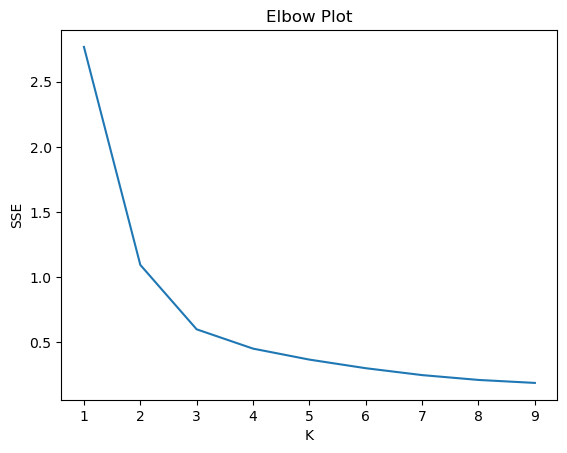

In [17]:
plt.plot(k_rng, sse)
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Plot")

# Davies Bouldin Score

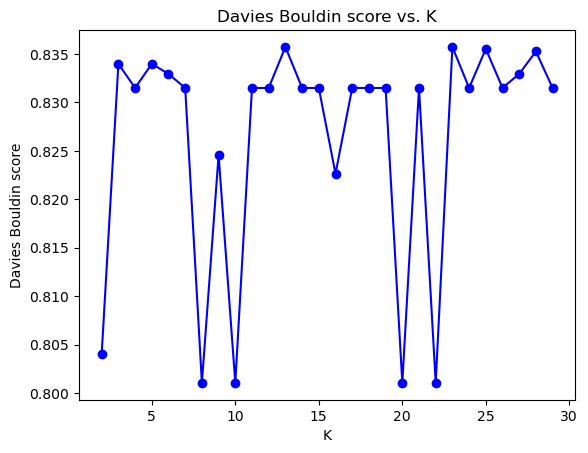

In [18]:
# Code from https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(kClustersDF[["longitude", "latitude"]], 4))
    
plt.plot(centers, scores, linestyle='-', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

## Scaler, Fit to our Data then Transform our Data

In [19]:
kClustersDF = kClustersDF.dropna()

scaler = StandardScaler()
kClustersDF[["long_t", "lat_t"]] = scaler.fit_transform(kClustersDF[["longitude", "latitude"]])

C:\Users\marya\AppData\Local\Temp\ipykernel_30644\4048673918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kClustersDF[["long_t", "lat_t"]] = scaler.fit_transform(kClustersDF[["longitude", "latitude"]])
C:\Users\marya\AppData\Local\Temp\ipykernel_30644\4048673918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kClustersDF[["long_t", "lat_t"]] = scaler.fit_transform(kClustersDF[["longitude", "latitude"]])


In [20]:
#invDF = inventoryAndCoordsDF["StationName"]
#invDF["inventory"] = inventoryAndCoordsDF["Change in number of bikes"]
#invDF["inventory_t"] = scaler.fit_transform(invDF["inventory"])

In [21]:
#inventoryAndCoords11PMDF
kClustersDF

StationId                           StationName  longitude   latitude  \
0            1             River Street, Clerkenwell  -0.109971  51.529200   
1            2        Phillimore Gardens, Kensington  -0.197574  51.499600   
2            3  Christopher Street, Liverpool Street  -0.084606  51.521300   
3            4       St. Chad's Street, King's Cross  -0.120974  51.530100   
4            5         Sedding Street, Sloane Square  -0.156876  51.493100   
..         ...                                   ...        ...        ...   
797        834           Gas Holders, Battersea Park  -0.147857  51.477966   
798        836                 York Way, Kings Cross  -0.125442  51.541596   
799        835            Farringdon Street, Holborn  -0.104948  51.516785   
800        838         Fore Street Avenue, Guildhall  -0.091402  51.518093   
801        839            Sea Containers, South Bank  -0.106840  51.507974   

     inventory  cluster_1    long_t     lat_t  
0         -5.0          2  0.339354  1.151244  
1         -9.0          0 -1.263765 -0.318032  
2          7.0          1  0.803534  0.759106  
3          0.0          2  0.138001  1.195918  
4         -1.0          0 -0.518999 -0.640677  
..         ...        ...       ...       ...  
797        5.0          2 -0.353953 -1.391894  
798        1.0          2  0.056237  1.766554  
799        0.0          2  0.431277  0.534992  
800        0.0          2  0.679168  0.599918  
801        3.0          2  0.396645  0.097634  

[781 rows x 8 columns]

C:\Users\marya\AppData\Local\Temp\ipykernel_30644\1702500978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["kmeans_"+str(k)] = kmeans.labels_
C:\Users\marya\AppData\Local\Temp\ipykernel_30644\1702500978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["kmeans_"+str(k)] = kmeans.labels_
C:\Users\marya\AppData\Local\Temp\ipykernel_30644\1702500978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

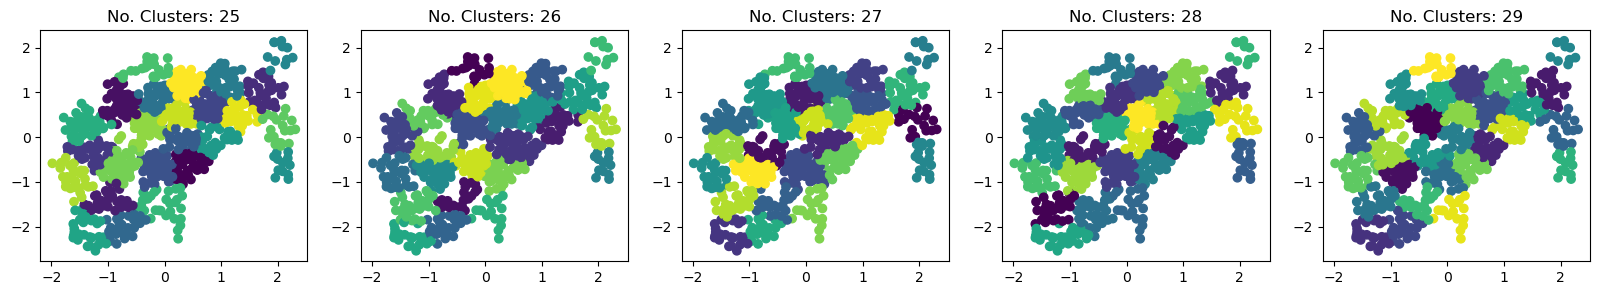

In [22]:
def K_Clustering(data, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[["long_t", "lat_t"]])
    data["kmeans_"+str(k)] = kmeans.labels_
    
    return data

def plotColouredScatter(df, xCol, yCol, clusterCol):
    plt.scatter(x=df[xCol], y=df[yCol], c=df[clusterCol])


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,3))
#k = 10

for k, ax in enumerate(fig.axes, start=25):
    clusteredDF = K_Clustering(kClustersDF, k)
    ax.scatter(x=clusteredDF["long_t"], y=clusteredDF["lat_t"], c=clusteredDF[f"kmeans_{k}"])
    #plotColouredScatter(clusteredDF, "long_t", "lat_t", f"kmeans_{k}")
    ax.set_title(f"No. Clusters: {k}")
    

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(kClustersDF[["long_t", "lat_t"]])

KMeans(n_clusters=3)

In [24]:
kClustersDF["kmeans_3"] = kmeans.labels_

C:\Users\marya\AppData\Local\Temp\ipykernel_30644\4024363480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kClustersDF["kmeans_3"] = kmeans.labels_


In [25]:
kClustersDF

StationId                           StationName  longitude   latitude  \
0            1             River Street, Clerkenwell  -0.109971  51.529200   
1            2        Phillimore Gardens, Kensington  -0.197574  51.499600   
2            3  Christopher Street, Liverpool Street  -0.084606  51.521300   
3            4       St. Chad's Street, King's Cross  -0.120974  51.530100   
4            5         Sedding Street, Sloane Square  -0.156876  51.493100   
..         ...                                   ...        ...        ...   
797        834           Gas Holders, Battersea Park  -0.147857  51.477966   
798        836                 York Way, Kings Cross  -0.125442  51.541596   
799        835            Farringdon Street, Holborn  -0.104948  51.516785   
800        838         Fore Street Avenue, Guildhall  -0.091402  51.518093   
801        839            Sea Containers, South Bank  -0.106840  51.507974   

     inventory  cluster_1    long_t     lat_t  kmeans_25  kmeans_26  \
0         -5.0          2  0.339354  1.151244         24         25   
1         -9.0          0 -1.263765 -0.318032          4         21   
2          7.0          1  0.803534  0.759106          5         13   
3          0.0          2  0.138001  1.195918         24         25   
4         -1.0          0 -0.518999 -0.640677         19         23   
..         ...        ...       ...       ...        ...        ...   
797        5.0          2 -0.353953 -1.391894         16          1   
798        1.0          2  0.056237  1.766554         17          0   
799        0.0          2  0.431277  0.534992         22         10   
800        0.0          2  0.679168  0.599918          5         13   
801        3.0          2  0.396645  0.097634          7          4   

     kmeans_27  kmeans_28  kmeans_29  kmeans_3  
0           10          6          5         2  
1           22         14         24         1  
2            7         24          7         0  
3           10          6          5         2  
4            1         23         15         1  
..         ...        ...        ...       ...  
797          8         10         19         1  
798         18         11         28         2  
799         19         27         23         2  
800         19         24          7         0  
801          3         25         12         2  

[781 rows x 14 columns]

## Plotting the Results

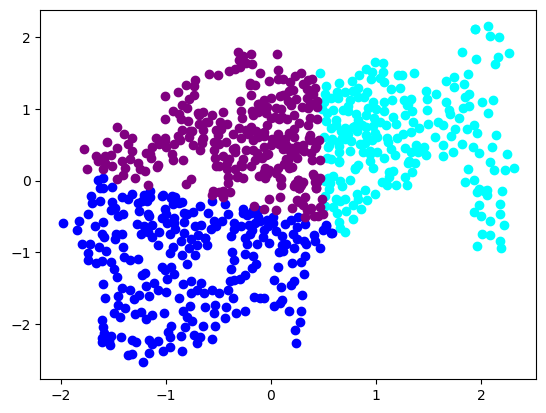

In [26]:
df0 = kClustersDF[kClustersDF.kmeans_3==0]
df1 = kClustersDF[kClustersDF.kmeans_3==1]
df2 = kClustersDF[kClustersDF.kmeans_3==2]
plt.scatter(df0.long_t, df0.lat_t, color="cyan")
plt.scatter(df1.long_t, df1.lat_t, color="blue")
plt.scatter(df2.long_t, df2.lat_t, color="purple")

In [27]:
u_labels = np